In [1]:
library(tidyverse)
library(lubridate)
library(gridExtra)
library(grid)
library(ggplot2)
library(lattice)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.1.0     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

Warning message:
"package 'ggplot2' was built under R version 4.0.5"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


Warning message:
"package 'gridExtra' was built under R version 4.0.5"

Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'lattice' was built under R version 4.0.5"


### Exercise 1
• a well established and diffused method for detecting a disease in blood fails to detect the presence
of disease in 15% of the patients that actually have the disease.

• A young UniPD startUp has developed an innovative method of screening. During the qualification
phase, a random sample of n = 75 patients known to have the disease is screened using the new
method.

(a) what is the probability distribution of y, the number of times the new method fails to detect the
disease ?

The variable y follows a binomial distribution.

In a bayesian approach , as the fail percentage is unknown, a uniform (improper) prior has to be chosen. Moreover, no upper limit is known.

(b) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is
the frequentist estimator of the failure probability of the new method?

The frequentist estimator is given by the ratio **6/75 = 8%**.

(c) setup a bayesian computation of the posterior probability, assuming a beta distribution with mean
value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot
the mean value and variance

(d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease
in ill patients is greater or equal than 15%, the new test is no better that the traditional method.
Test the sample at a 5% level of significance in the Bayesian way.

(e) Perform the same hypothesis test in the classical frequentist way.

The distribution is assumed as a binomial as there are only two outcomes.

The mean of the distribution: 0.0847867418721085

The variance of the distribution: 0.000952062488504845



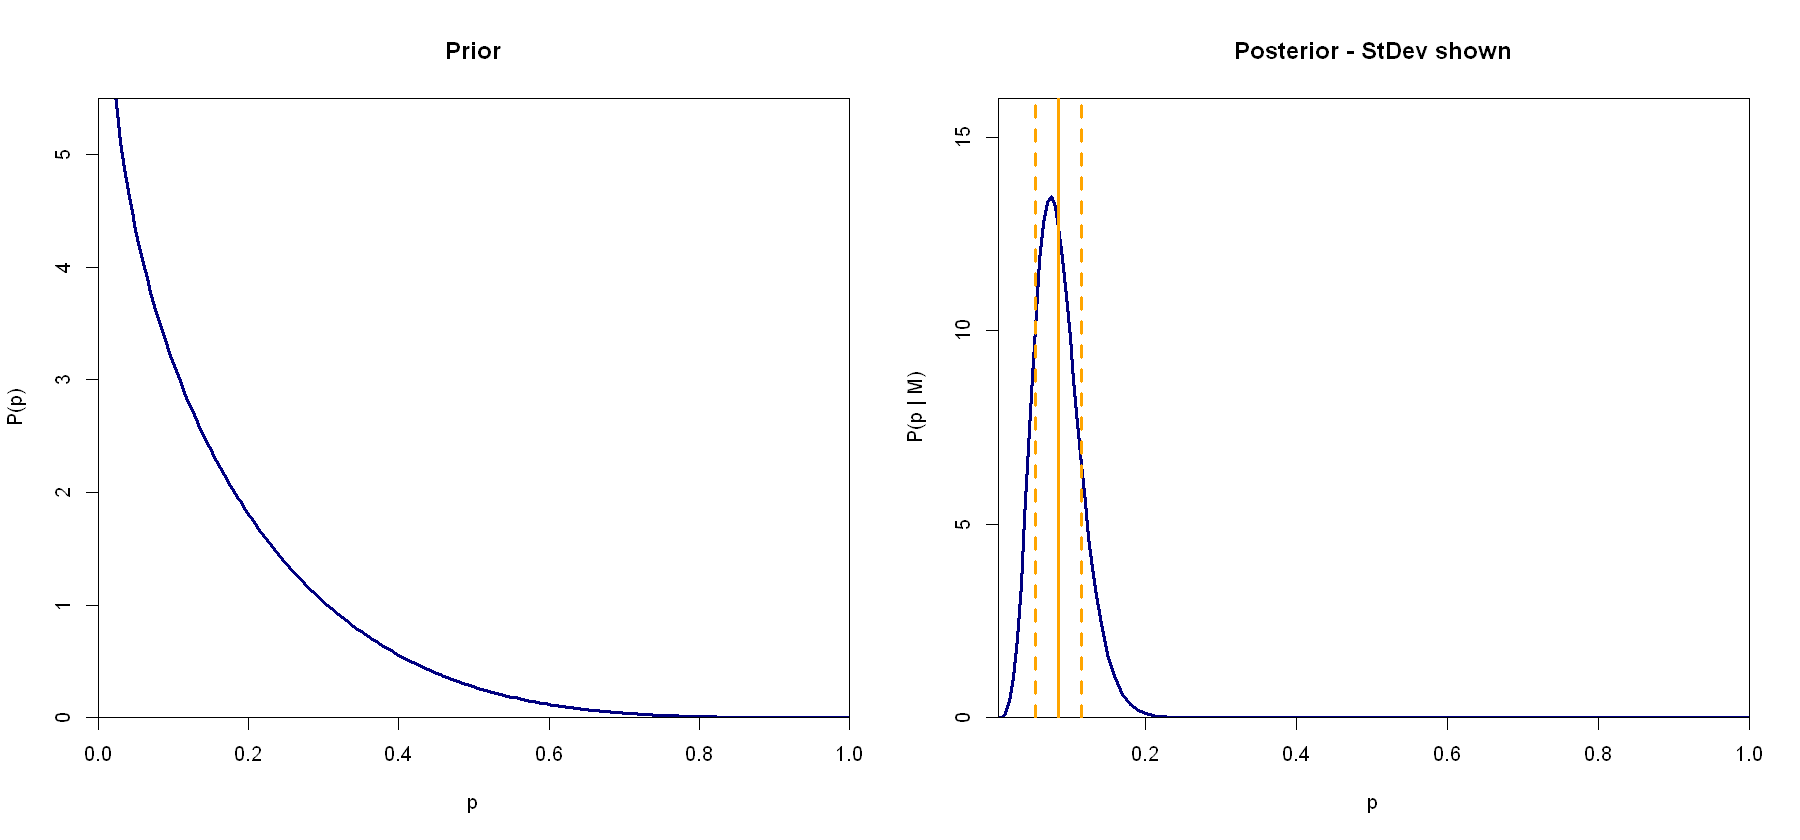

In [2]:
p <- seq(0, 1, length.out = 201)

mu = 0.15
var = 0.14^2

alpha <- ((1 - mu) / var - 1 / mu) * mu ^ 2 +6
beta  <- ((1 - mu) / var - 1 / mu) * mu ^ 2 * (1 / mu - 1) +69

ret_post <- function(probab, a = alpha, b = beta){
    dbeta(probab, shape1 = a, shape2 = b)
}

mean = alpha/(alpha+beta)
variance = alpha*beta/((alpha+beta)^2 *(alpha+beta+1))

message("The distribution is assumed as a binomial as there are only two outcomes.")
message("The mean of the distribution: " , mean)
message("The variance of the distribution: ", variance)

options(repr.plot.width=15, repr.plot.height=7)
par(mfrow = c(1,2))

plot(p, dbeta(p, alpha-6, beta-69) , xaxs='i', yaxs='i', col='navy', type='l', lty=1, lwd = 3, ylim=c(0,5.5), xlab="p", ylab=paste("P(p)"), main="Prior")

plot(p[-1], ret_post(p)[-1], xaxs='i', yaxs='i', col='navy', type='l', lty=1, lwd = 3, ylim=c(0,16), xlab="p", ylab=paste("P(p | M)"), main="Posterior - StDev shown")

abline(v = mean, col="orange", lwd=3, lty=1)
abline(v = mean-sqrt(variance), col="orange", lwd=3, lty=2)
abline(v = mean+sqrt(variance), col="orange", lwd=3, lty=2)

In [3]:
integral = integrate(ret_post, lower = 0, upper = 0.15)
message("As the integral from 0 to 0.15 is: " , pbeta(0.15, alpha, beta), " , which is greater than 95% (our C.I.), \nthe significance level is reached and the null hypothesis is rejected. \nThe new test is better than the old one.")

As the integral from 0 to 0.15 is: 0.968720669702045 , which is greater than 95% (our C.I.), 
the significance level is reached and the null hypothesis is rejected. 
The new test is better than the old one.



Summing the probability up to 6 cases gives 0.0543533033542315 - the red line in the figure.
From a frequentist point of view, we are not allowed to reject the null hypothesis at 95% CL.

As shown in the picture, the green line (equal to our alpha = 0.05) is slightly below the red one

We are NOT able to define the new test as better than the old one at 95% CL.



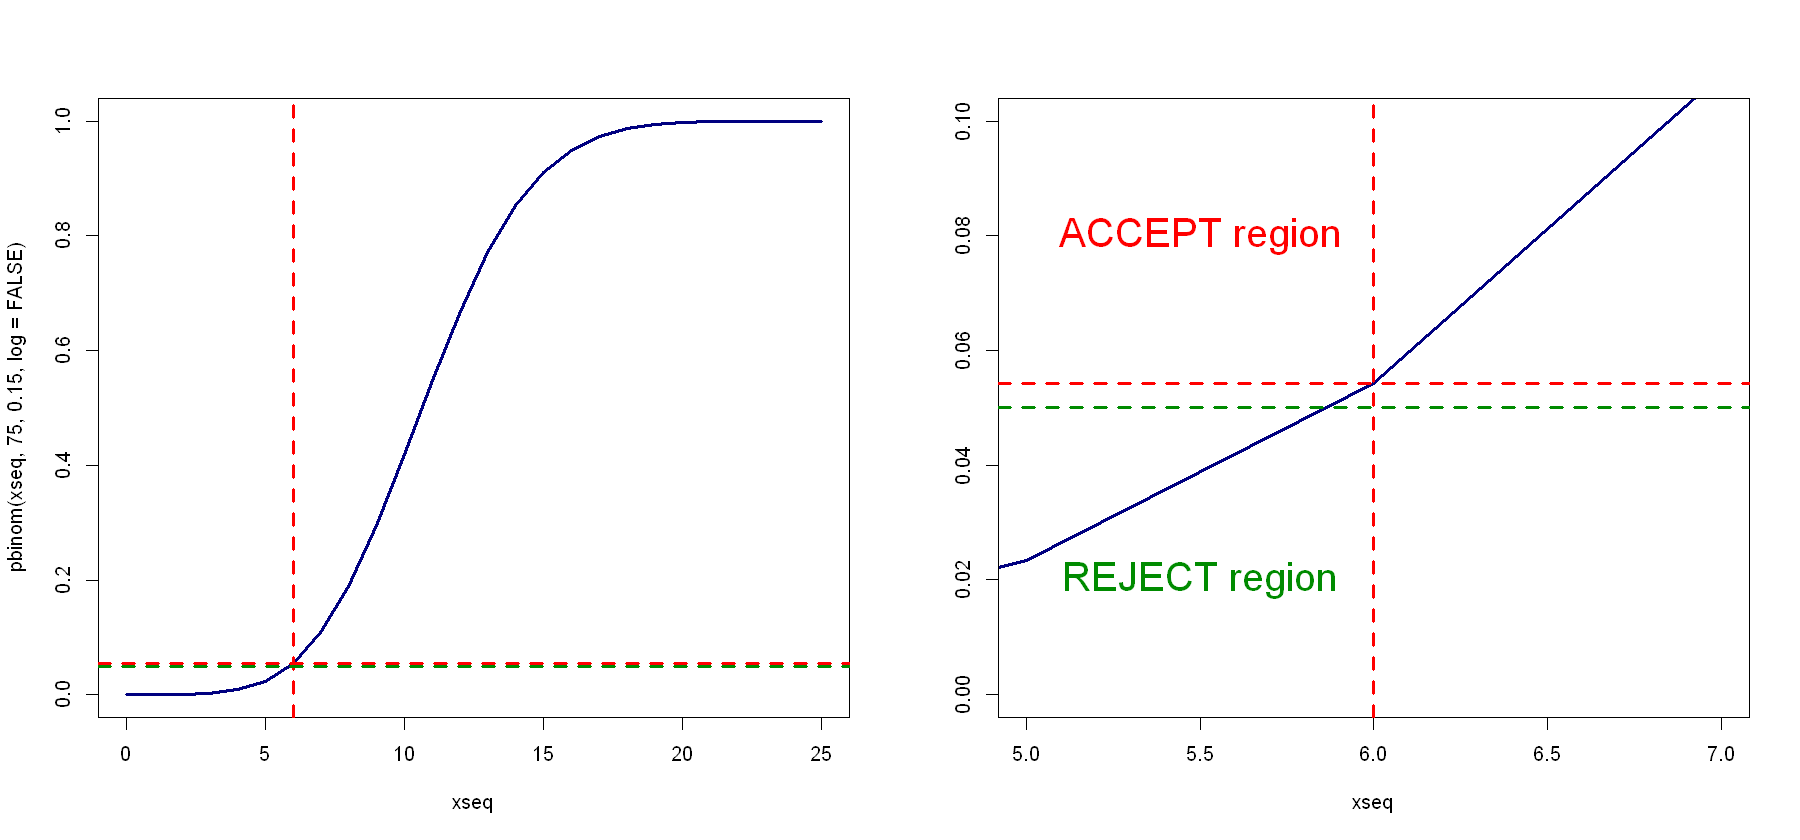

In [4]:
ret_freq <- function(probab){
    pbinom(probab, size = 75, prob = 0.15)
}

par(mfrow = c(1,2))
xseq <- seq(0, 25, length.out = 26)

#plot(xseq, dbinom(xseq, 75, 0.15, log = FALSE), t = 'l', col="green4", lwd=3, lty=1)

plot(xseq, pbinom(xseq, 75, 0.15, log = FALSE), t = 'l', col="navy", lwd=3, lty=1)

abline(v = 6, col="red", lwd=3, lty=2)
abline(h = pbinom(6, 75, 0.15, log = FALSE), col="red", lwd=3, lty=2)
abline(h = 0.05, col="green4", lwd=3, lty=2)


options(repr.plot.width=15, repr.plot.height=7)


plot(xseq, pbinom(xseq, 75, 0.15, log = FALSE), t = 'l', col="navy", lwd=3, lty=1, xlim = c(5,7), ylim = c(0.0,0.1),
     ylab = "")

#plot(y ~ x, data = lin,xlim=c(0,2), ylim=c(0,2))
abline(v = 6, col="red", lwd=3, lty=2)
abline(h = pbinom(6, 75, 0.15, log = FALSE), col="red", lwd=3, lty=2)
abline(h = 0.05, col="green4", lwd=3, lty=2)

message("Summing the probability up to 6 cases gives ", pbinom(6, 75, 0.15, log = FALSE) , " - the red line in the figure.\nFrom a frequentist point of view, we are not allowed to reject the null hypothesis at 95% CL.")
message("As shown in the picture, the green line (equal to our alpha = 0.05) is slightly below the red one")

message("We are NOT able to define the new test as better than the old one at 95% CL.")

text(x = 5.5, y=0.08, "ACCEPT region", cex = 2, col = 'red')
text(x = 5.5, y=0.02, "REJECT region", cex = 2, col = 'green4')


In [5]:
binom.test(x=6, n=75, p=0.15, alternative = 'less')
message("Indeed, the p-value is greater than 5% - so we can not say p>0.15 at 0.95 CL")


	Exact binomial test

data:  6 and 75
number of successes = 6, number of trials = 75, p-value = 0.05435
alternative hypothesis: true probability of success is less than 0.15
95 percent confidence interval:
 0.0000000 0.1517971
sample estimates:
probability of success 
                  0.08 


Indeed, the p-value is greater than 5% - so we can not say p>0.15 at 0.95 CL



### Exercise 2

• Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the
Poisson distribution can be very useful in applied statistics when describing low-frequency events
in a large population. In a famous example he showed that the number of deaths by horse kick
among the Prussian army follows the Poisson distribution.

• Considering the following to sets of observations taken over a fixed large time interval in two different
corps:

| y : Death Soldiers | 0 | 1 | 2 | 3 | 4 | >5 |
| --- | --- | --- | --- | --- | --- | --- |
| N1 observations | 109 | 65  | 22 | 3 | 1 | 0 |
| N2 observations |144 |91 |32 |11| 2 |0|

(a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over
the measurement time. Determine the posterior mean, median and variance, and compute the 95%
credibility interval.

(b) assuming now a Jeffreys’ prior,   g(λ) ∝ $\frac{1}{\sqrt \lambda}$   with λ > 0

compute and plot the posterior distribution for λ, the death rate over the measurement time.

Determine the posterior mean, median and variance, and compute the 95% credibility interval

Mean, median and variance - Uniform Prior - N1 0.615 - 0.613334138689371 - 0.003075

Mean, median and variance - Uniform Prior - N2 0.703571428571429 - 0.702381311150158 - 0.00251275510204082

95% CI for Uniform Prior, N1   - [0.511125127453667, 0.728340849258335]

95% CI for Uniform Prior, N2   - [0.608748715998147, 0.80515704563232]



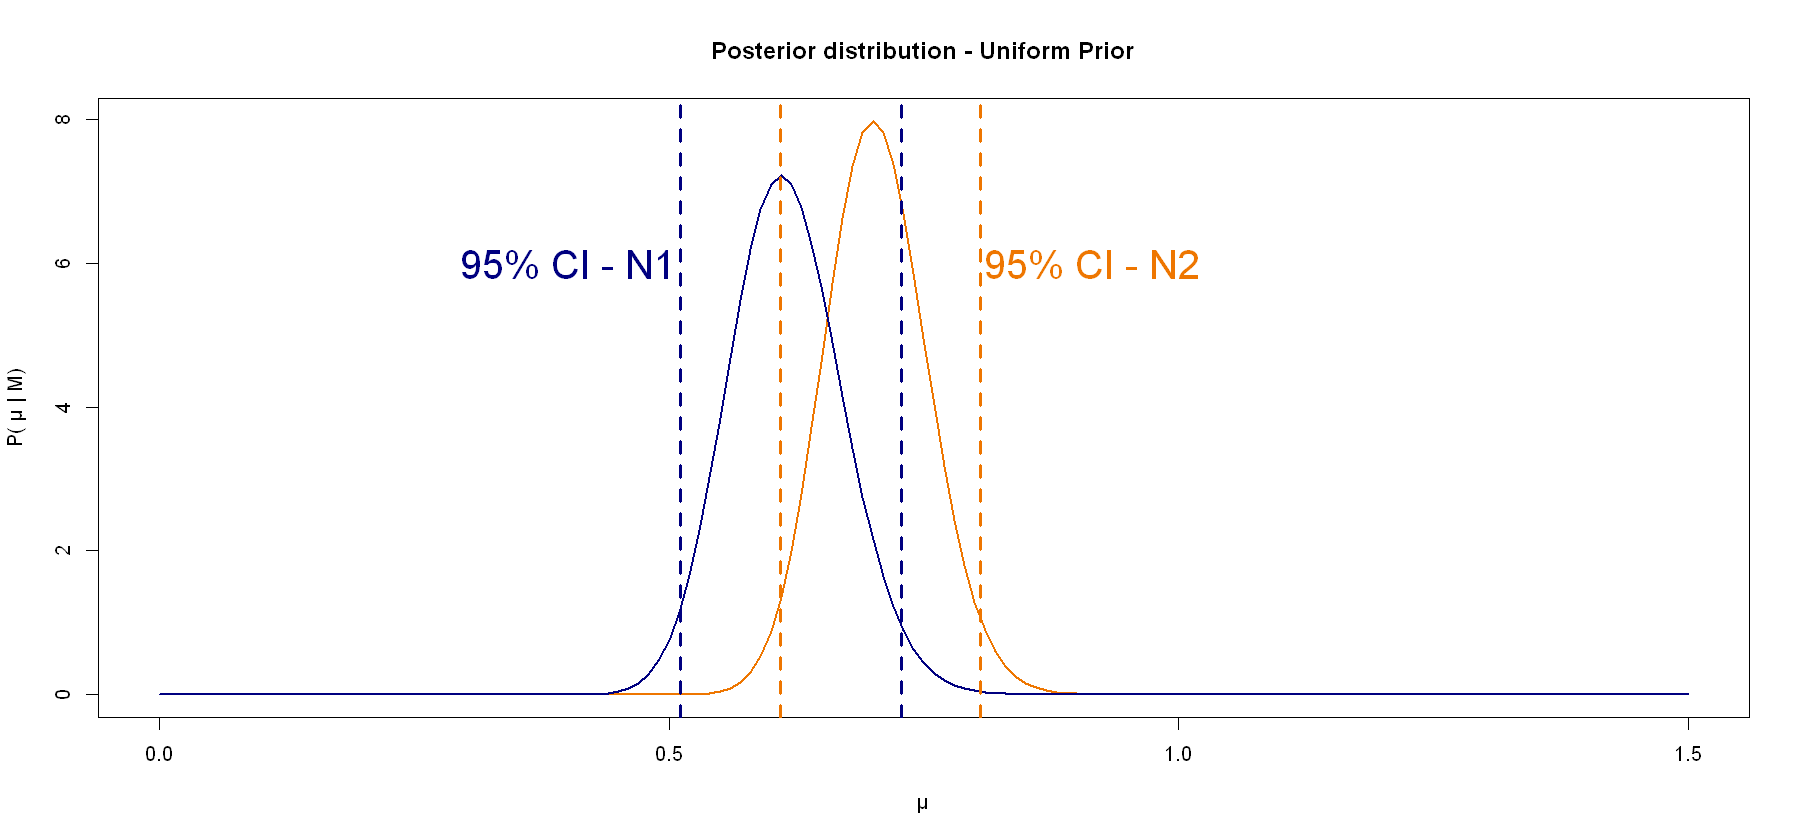

In [6]:
val <- c(0,1,2,3,4)
n1 <- c(109,65,22,3,1)
n2 <- c(144,91,32,11,2)

pois_post <- function(x, shape, rate){
        dgamma(x, shape, rate)
}
    

means <- seq(0,1.5, 0.01)
vecrn1 <- pois_post(means, sum(n1*val)+1,sum(n1))

vecrn2 <- pois_post(means, sum(n2*val)+1,sum(n2))

plot(means, vecrn2, lwd = 2, col = 'darkorange2', t = 'l', xlab = "µ", ylab = "P( µ | M)", main = "Posterior distribution - Uniform Prior")
lines(means, vecrn1, lwd = 2, col = 'navy', t = 'l', xlab = "µ", ylab = "P( µ | M)", main = "Posterior distribution - Uniform Prior")


mean_d1 <- 123/200
mean_d2 <- 197/280

med_d1 <- qgamma(0.5, sum(n1*val)+1,sum(n1))
med_d2 <- qgamma(0.5, sum(n2*val)+1,sum(n2))

var_d1 <- 123/200^2
var_d2 <- 197/280^2

message("Mean, median and variance - Uniform Prior - N1 ", mean_d1, " - ", med_d1,  " - ", var_d1)
message("Mean, median and variance - Uniform Prior - N2 ", mean_d2, " - ", med_d2,  " - ", var_d2)

shape.unif = sum(n1*val)+1
rate.unif  =  sum(n1)
message("95% CI for Uniform Prior, N1   - [", qgamma(0.025,shape.unif, rate.unif) , ", ", qgamma(0.975,shape.unif, rate.unif), "]")

shape.unif2 = sum(n2*val)+1
rate.unif2  =  sum(n2)
message("95% CI for Uniform Prior, N2   - [", qgamma(0.025,shape.unif2, rate.unif2) , ", ", qgamma(0.975,shape.unif2, rate.unif2), "]")


d1min <- qgamma(0.025,shape.unif, rate.unif)
d1max <- qgamma(0.975,shape.unif, rate.unif)

d2min <-  qgamma(0.025,shape.unif2, rate.unif2)
d2max <-  qgamma(0.975,shape.unif2, rate.unif2)


abline(v = d1min, col="navy", lwd=3, lty=2)
abline(v = d1max, col="navy", lwd=3, lty=2)
abline(v = d2min, col="darkorange2", lwd=3, lty=2)
abline(v = d2max, col="darkorange2", lwd=3, lty=2)


text(x=d1min-0.11, y=6, "95% CI - N1", cex = 2, col = 'navy')
text(x=d2max+0.11, y=6, "95% CI - N2", cex = 2, col = 'darkorange2')


Mean, median and variance - Uniform Prior - N1 0.6125 - 0.61083414198632 - 0.0030625

Mean, median and variance - Uniform Prior - N2 0.701785714285714 - 0.700595597779037 - 0.00250637755102041

95% CI for Jeffrey's Prior, N1   - [0.508846403321931, 0.7256195506598]

95% CI for Jeffrey's Prior, N2   - [0.607087813281968, 0.803246513471308]

No comparison is drawn between the two priors as the posterior are heavily independent of the chosen prior.
They mostly overlap due to the high number of samples.



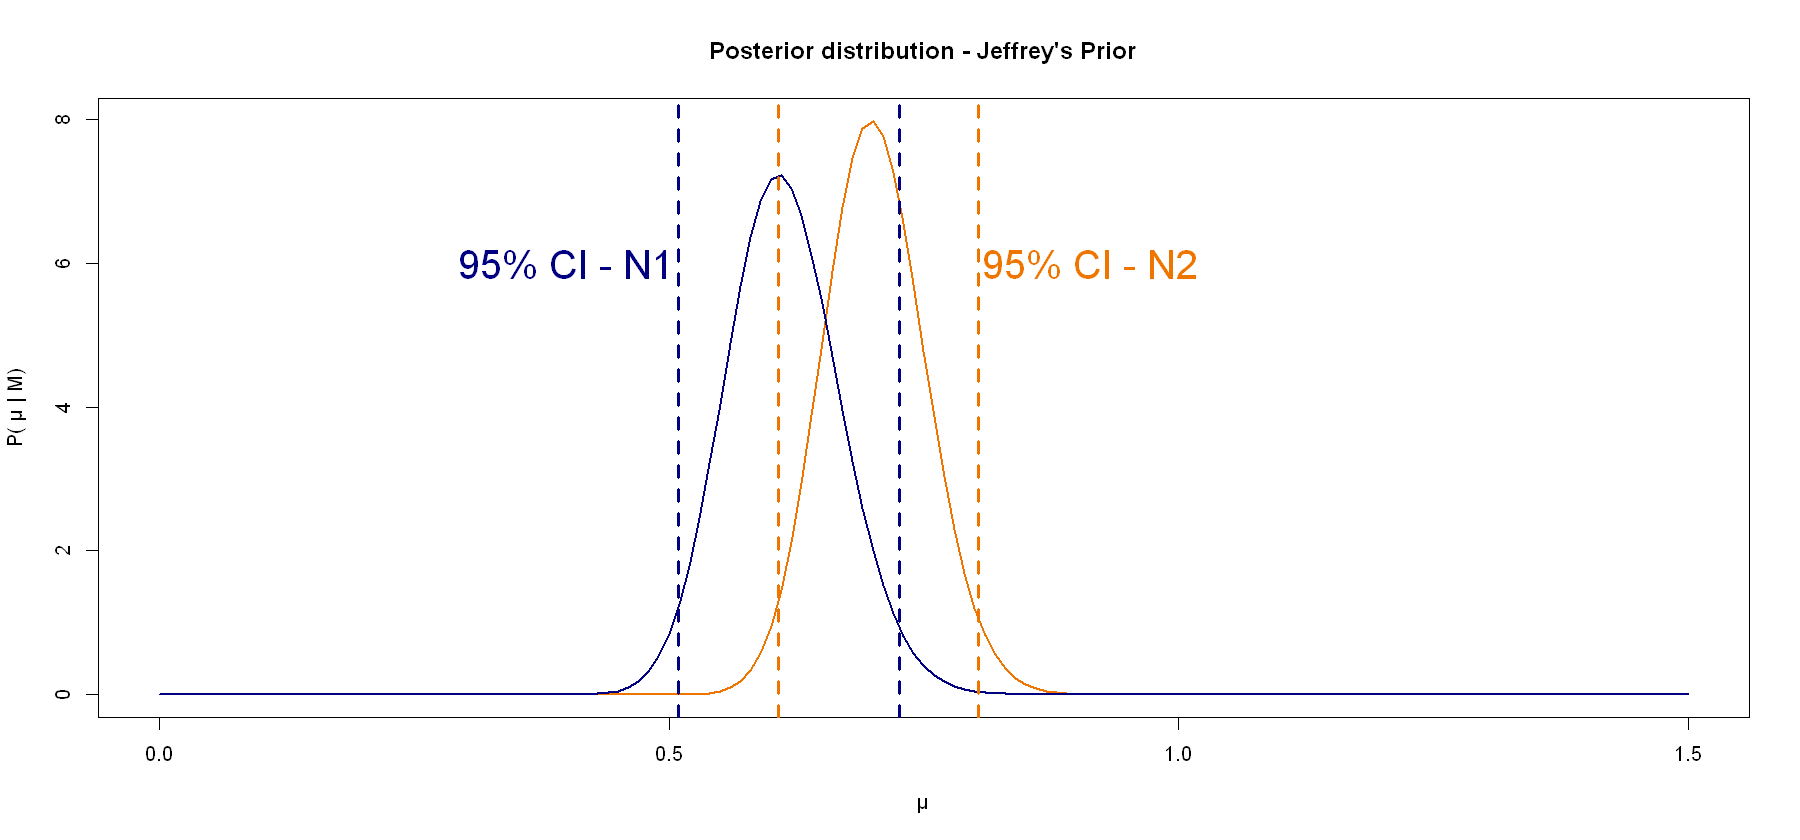

In [7]:
vecr_pois1 <- pois_post(means, sum(n1*val)+0.5,sum(n1))
vecr_pois2 <- pois_post(means, sum(n2*val)+0.5,sum(n2))

plot(means, vecr_pois2, lwd = 2, col = 'darkorange2', t = 'l', xlab = "µ", ylab = "P( µ | M)" , main = "Posterior distribution - Jeffrey's Prior")
lines(means, vecr_pois1, lwd = 2, col = 'navy', t = 'l', xlab = "µ", ylab = "P( µ | M)", main = "Posterior distribution - Jeffrey's Prior")

mean_pois1 <- 122.5/200
mean_pois2 <- 196.5/280

med_pois1 <- qgamma(0.5, sum(n1*val)+0.5,sum(n1))
med_pois2 <- qgamma(0.5, sum(n2*val)+0.5,sum(n2))

var_pois1 <- 122.5/200^2
var_pois2 <- 196.5/280^2

message("Mean, median and variance - Uniform Prior - N1 ", mean_pois1, " - ", med_pois1,  " - ", var_pois1)
message("Mean, median and variance - Uniform Prior - N2 ", mean_pois2, " - ", med_pois2,  " - ", var_pois2)


shape.unif = sum(n1*val)+0.5
rate.unif  =  sum(n1)
message("95% CI for Jeffrey's Prior, N1   - [", qgamma(0.025,shape.unif, rate.unif) , ", ", qgamma(0.975,shape.unif, rate.unif), "]")

shape.unif2 = sum(n2*val)+0.5
rate.unif2  =  sum(n2)
message("95% CI for Jeffrey's Prior, N2   - [", qgamma(0.025,shape.unif2, rate.unif2) , ", ", qgamma(0.975,shape.unif2, rate.unif2), "]")


d1min <- qgamma(0.025,shape.unif, rate.unif)
d1max <- qgamma(0.975,shape.unif, rate.unif)

d2min <-  qgamma(0.025,shape.unif2, rate.unif2)
d2max <-  qgamma(0.975,shape.unif2, rate.unif2)


abline(v = d1min, col="navy", lwd=3, lty=2)
abline(v = d1max, col="navy", lwd=3, lty=2)
abline(v = d2min, col="darkorange2", lwd=3, lty=2)
abline(v = d2max, col="darkorange2", lwd=3, lty=2)


text(x=d1min-0.11, y=6, "95% CI - N1", cex = 2, col = 'navy')
text(x=d2max+0.11, y=6, "95% CI - N2", cex = 2, col = 'darkorange2')

message("No comparison is drawn between the two priors as the posterior are heavily independent of the chosen prior.
They mostly overlap due to the high number of samples.")

### Exercise 3

• A study on water quality of streams, a high level of bacter X was defined as a level greater than 100
per 100 ml of stream water. 

n = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, y = 11 had a high bacter X level.

• indicating with p the probability that a sample of water taken from the stream has a high bacter
X level,

(a) find the frequentist estimator for p

(b) using a Beta(1, 10) prior for p, calculate and posterior distribution P(p | y)
  
(c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

(d) test the hypotesis $H_0$ : $p = 0.1$ versus $H_1$ : $p \neq 0.1$
at 5% level of significance with both the frequentist and bayesian approach



Frequentist approach - p = 0.0948275862068965

Mean, median and variance - Beta Prior 0.094488188976378 - 0.0923608528980051 - 0.000668438836877674

95% CI for Beta Prior - [0.0501852163002454, 0.150837921271285]

As 0.1 stands inside the 0.95 condifence interval, the null hypothesis still is to be accepted.



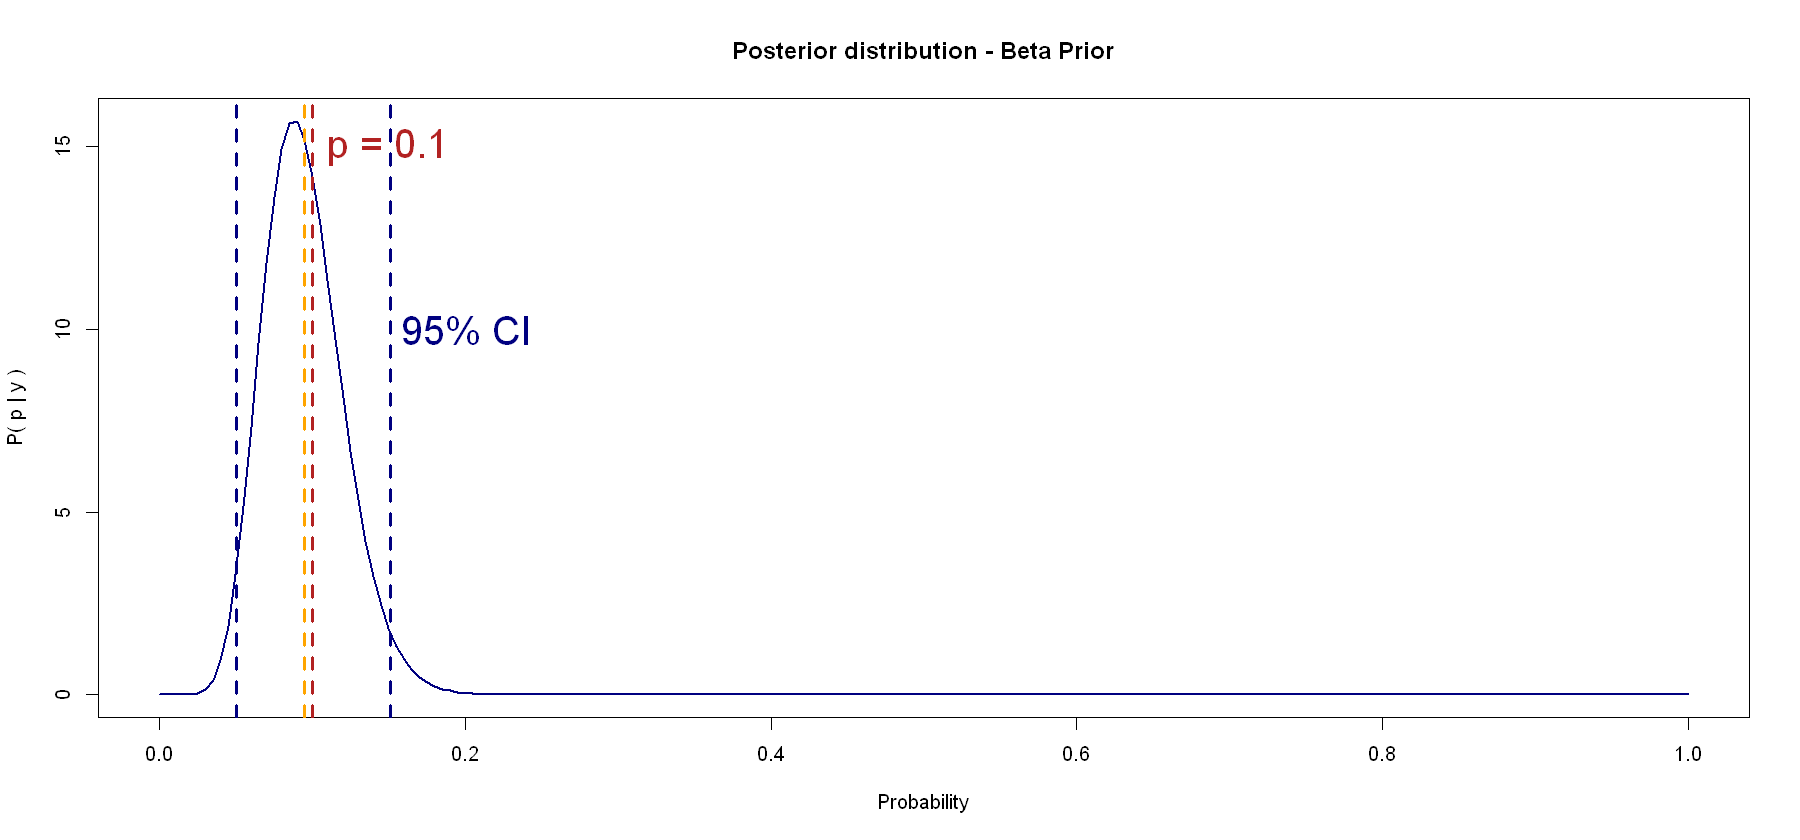

In [8]:
p_freq = 11/116
message("Frequentist approach - p = ", p_freq)

ret_baies <- function(probab){
    dbeta(p, shape1 = 1+11, shape2 = 10+116-11) 
}

plot(p, ret_baies(p), lwd = 2, col = 'navy', t = 'l', xlab = "Probability", ylab = "P( p | y )" , main = "Posterior distribution - Beta Prior")
abline(v = 0.0948275862068965, col="orange", lwd=3, lty=2)

a = 12
b = 115
mean = a/(a+b)
variance = a*b/((a+b)^2 *(a+b+1))
median = qbeta(0.5, shape1 = 1+11, shape2 = 10+116-11)

message("Mean, median and variance - Beta Prior ", mean, " - ", median,  " - ", variance)
message("95% CI for Beta Prior - [", qbeta(0.025,shape1 = 1+11, shape2 = 10+116-11) , ", ", qbeta(0.975,shape1 = 1+11, shape2 = 10+116-11), "]")


min <-  qbeta(0.025,shape1 = 1+11, shape2 = 10+116-11)
max <-  qbeta(0.975,shape1 = 1+11, shape2 = 10+116-11)


abline(v = min, col="navy", lwd=3, lty=2)
abline(v = max, col="navy", lwd=3, lty=2)

abline(v = 0.1, col="firebrick", lwd=3, lty=2)
text(x=0.1+0.05, y=15, "p = 0.1", cex = 2, col = 'firebrick')


text(x=max+0.05, y=10, "95% CI", cex = 2, col = 'navy')


message("As 0.1 stands inside the 0.95 condifence interval, the null hypothesis still is to be accepted.")

Also in this case 11 is clearly on the inside of the confidence interval - the null hypothesis is accepted.




	Exact binomial test

data:  11 and 116
number of successes = 11, number of trials = 116, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.04829409 0.16333954
sample estimates:
probability of success 
            0.09482759 


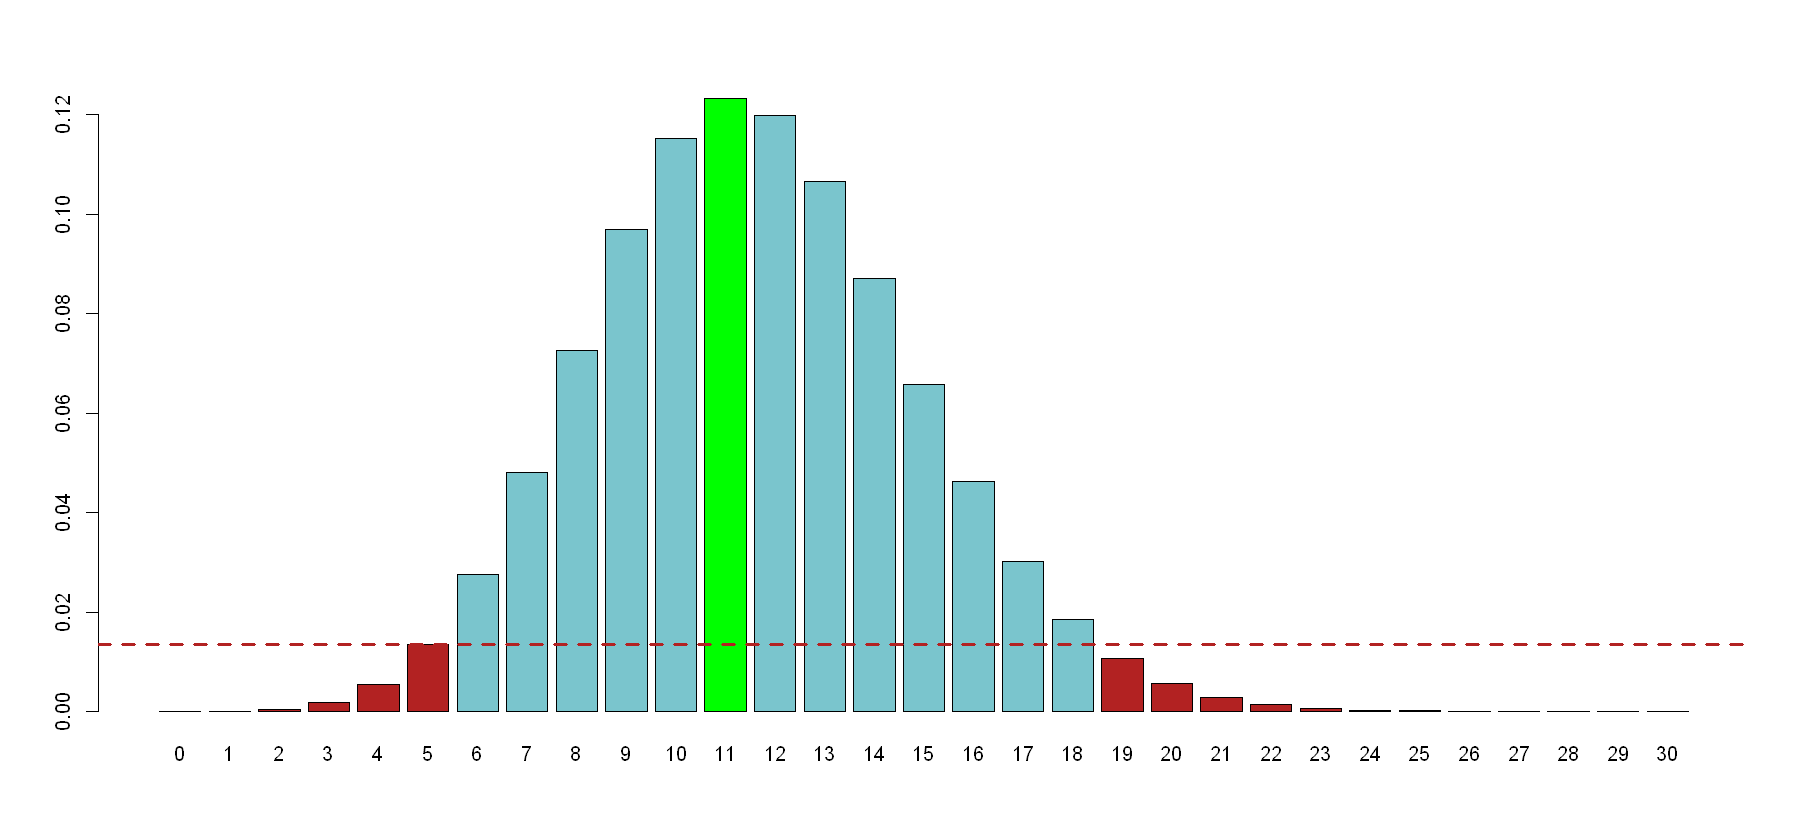

In [9]:
p_int = 0:30

#plot(p_int, dbinom(p_int, size = 116, p= 0.1), t = 's', col = 'navy', lwd = 2)
message("Also in this case 11 is clearly on the inside of the confidence interval - the null hypothesis is accepted.")
binom.test(x=11, n=116, p=0.1)


colorz = c(rep('firebrick', 6), rep('cadetblue3', 5), 'green', rep('cadetblue3', 7))

barplot(dbinom(p_int, size = 116, prob= 0.1), names.arg=0:30, col = colorz)
abline(h = dbinom(5, size = 116, prob= 0.1), col="firebrick", lwd=3, lty=2)


• a new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter
X level

(e) find the frequentist estimator for p

(f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior
probability of the older measurement as the prior for the new one.

(g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

(h) test the hypotesis

$H_0$ : $p = 0.1$ versus $H_1$ : $p \neq 0.1$

at 5% level of significance with both the frequentist and bayesian approach

Frequentist approach - p = 0.0545454545454545

Mean, median and variance - Beta Prior 0.094488188976378 - 0.0551443650587038 - 0.000668438836877674

95% CI for Beta Prior - [0.0277391826703088, 0.0953801238877073]

As 0.1 stands OUTSIDE! the 0.95 condifence interval, the null hypothesis has to be rejected for the beta(1,10) distribution.



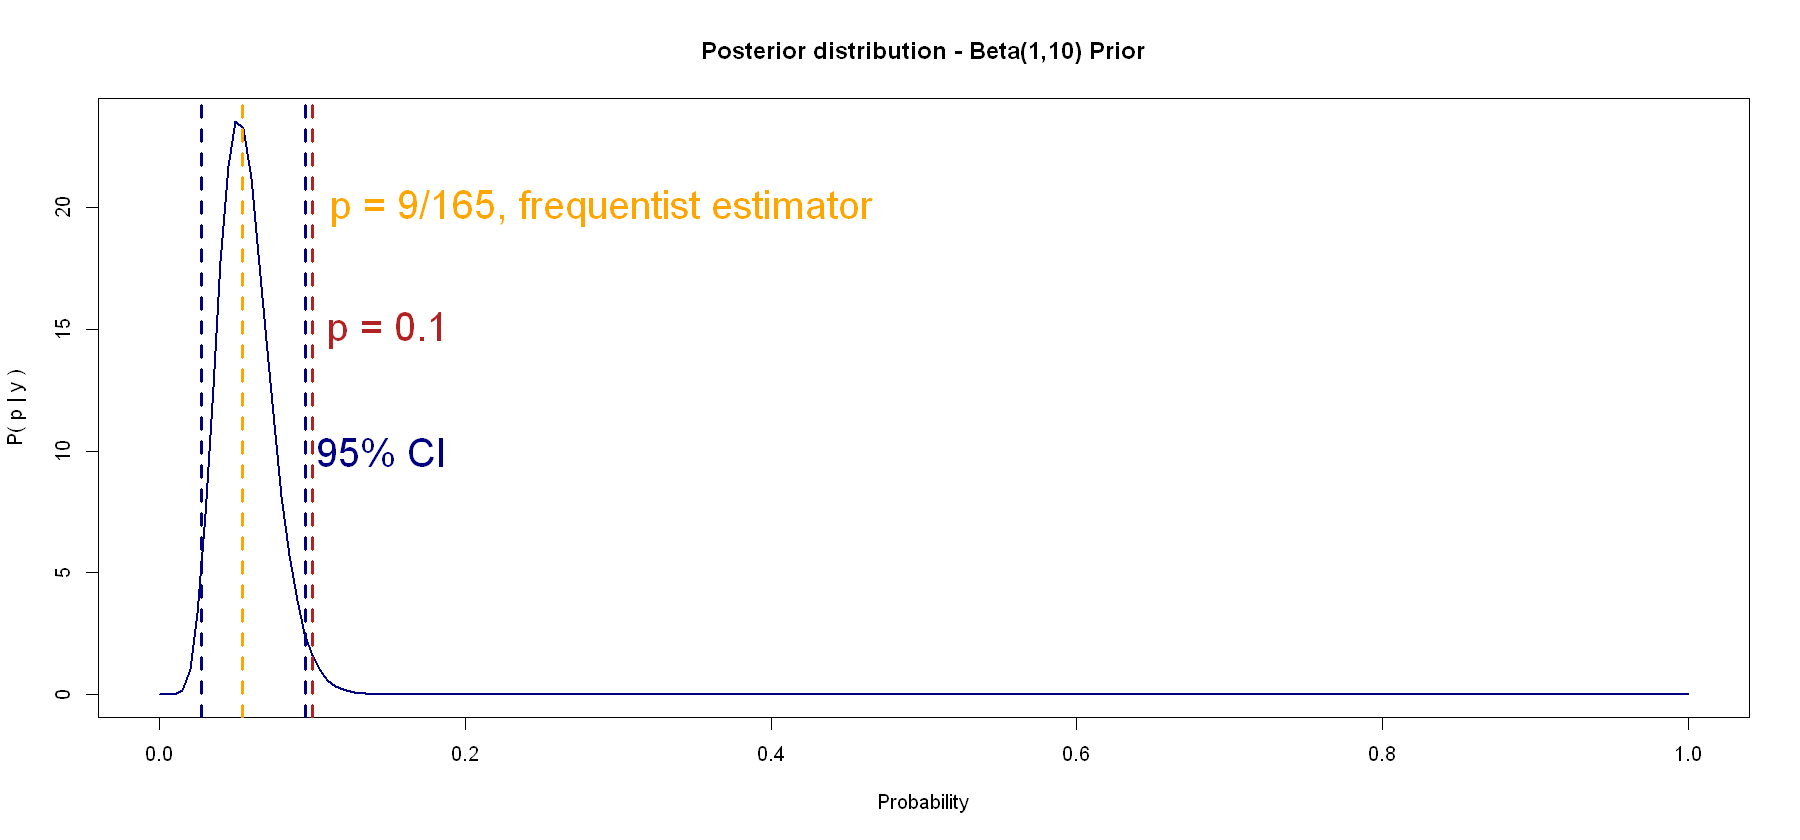

In [10]:
p_freq = 9/165
message("Frequentist approach - p = ", p_freq)

ret_baies <- function(probab){
    dbeta(p, shape1 = 1+9, shape2 = 10+165-9) 
}

plot(p, ret_baies(p), lwd = 2, col = 'navy', t = 'l', xlab = "Probability", ylab = "P( p | y )" 
     , main = "Posterior distribution - Beta(1,10) Prior")

abline(v = 9/165, col="orange", lwd=3, lty=2)

sh1 = 1+9
sh2 = 10+165-9

a = 12
b = 115
mean = a/(a+b)
variance = a*b/((a+b)^2 *(a+b+1))
median = qbeta(0.5, shape1 = sh1, shape2 = sh2)


message("Mean, median and variance - Beta Prior ", mean, " - ", median,  " - ", variance)
message("95% CI for Beta Prior - [", qbeta(0.025,shape1 = sh1, shape2 = sh2) , ", ", qbeta(0.975,shape1 = sh1, shape2 = sh2), "]")

sh1 = 1+9
sh2 = 10+165-9
min <-  qbeta(0.025,shape1 = sh1, shape2 = sh2)
max <-  qbeta(0.975,shape1 = sh1, shape2 = sh2)


abline(v = min, col="navy", lwd=3, lty=2)
abline(v = max, col="navy", lwd=3, lty=2)

abline(v = 0.1, col="firebrick", lwd=3, lty=2)
text(x=0.1+0.05, y=15, "p = 0.1", cex = 2, col = 'firebrick')


text(x=max+0.05, y=10, "95% CI", cex = 2, col = 'navy')
text(x=0.29, y=20, "p = 9/165, frequentist estimator", cex = 2, col = 'orange')


message("As 0.1 stands OUTSIDE! the 0.95 condifence interval, the null hypothesis has to be rejected for the beta(1,10) distribution.")

Frequentist approach - p = 0.0545454545454545

Mean, median and variance - Beta Prior 0.094488188976378 - 0.0551443650587038 - 0.000668438836877674

95% CI for Beta Prior - [0.0277391826703088, 0.0953801238877073]

In this case instead 0.1 stands inside the 0.95 confience interval. The outcome of this analysis in this case strongly depends on the selected prior.



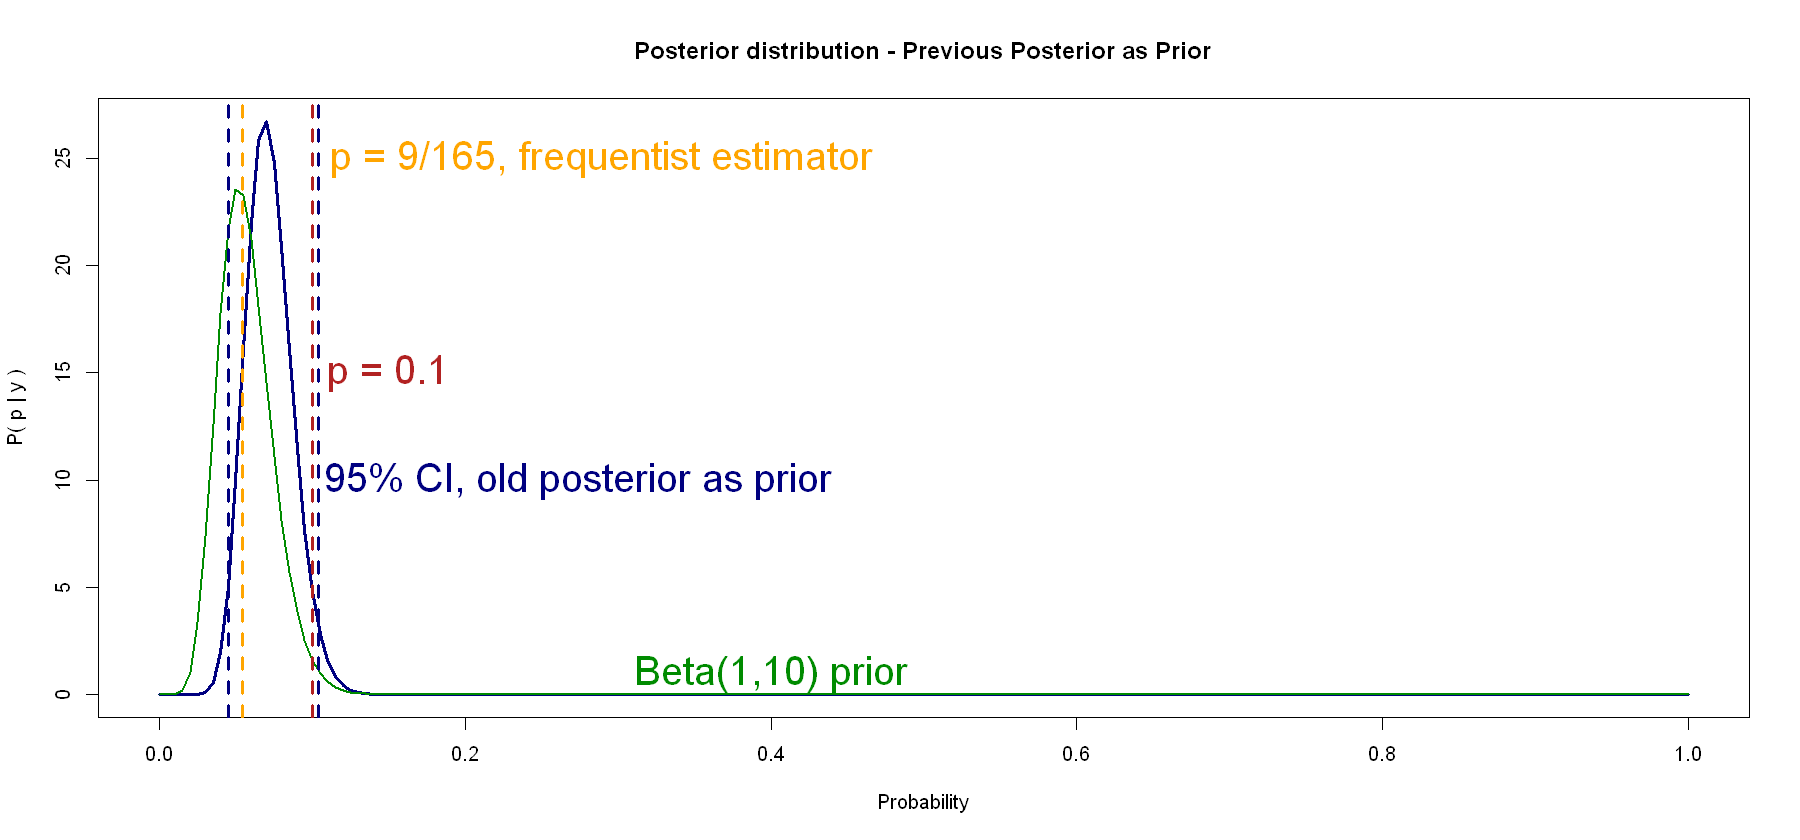

In [11]:
p_freq = 9/165
message("Frequentist approach - p = ", p_freq)

ret_baies_doublebeta <- function(probab){
    dbeta(p, shape1 = 1+11+9, shape2 = 10+116-11+165-9) 
}

plot(p, ret_baies_doublebeta(p), lwd = 3, col = 'navy', t = 'l', xlab = "Probability", ylab = "P( p | y )" , main = "Posterior distribution - Previous Posterior as Prior")
abline(v = 9/165, col="orange", lwd=3, lty=2)
lines(p, ret_baies(p), lwd = 2, col = 'green4', t = 'l', xlab = "Probability", ylab = "P( p | y )" 
             , main = "Posterior distribution - Beta(1,10) Prior")
sh1 = 1+9
sh2 = 10+165-9

a = 12
b = 115
mean = a/(a+b)
variance = a*b/((a+b)^2 *(a+b+1))
median = qbeta(0.5, shape1 = sh1, shape2 = sh2)


message("Mean, median and variance - Beta Prior ", mean, " - ", median,  " - ", variance)
message("95% CI for Beta Prior - [", qbeta(0.025,shape1 = sh1, shape2 = sh2) , ", ", qbeta(0.975,shape1 = sh1, shape2 = sh2), "]")

sh1 = 1+11+9
sh2 = 10+116-11+165-9
min <-  qbeta(0.025,shape1 = sh1, shape2 = sh2)
max <-  qbeta(0.975,shape1 = sh1, shape2 = sh2)


abline(v = min, col="navy", lwd=3, lty=2)
abline(v = max, col="navy", lwd=3, lty=2)
abline(v = 0.1, col="firebrick", lwd=3, lty=2)

text(x=0.1+0.05, y=15, "p = 0.1", cex = 2, col = 'firebrick')
text(x=max+0.17, y=10, "95% CI, old posterior as prior", cex = 2, col = 'navy')
text(x=0.40, y=1, "Beta(1,10) prior", cex = 2, col = 'green4')
text(x=0.29, y=25, "p = 9/165, frequentist estimator", cex = 2, col = 'orange')


message("In this case instead 0.1 stands inside the 0.95 confience interval. The outcome of this analysis in this case strongly depends on the selected prior.")


	Exact binomial test

data:  9 and 165
number of successes = 9, number of trials = 165, p-value = 0.05112
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.02524192 0.10101679
sample estimates:
probability of success 
            0.05454545 


As the considered distribution is a discrete one, the alpha in this case is slightly different from 0.5: 0.0365609583009552

As shown in the figure, the nineth bin is still inside the acceptance zone - the null hypothesis has then still to be accepted, even if it is really close to the rejection region. 



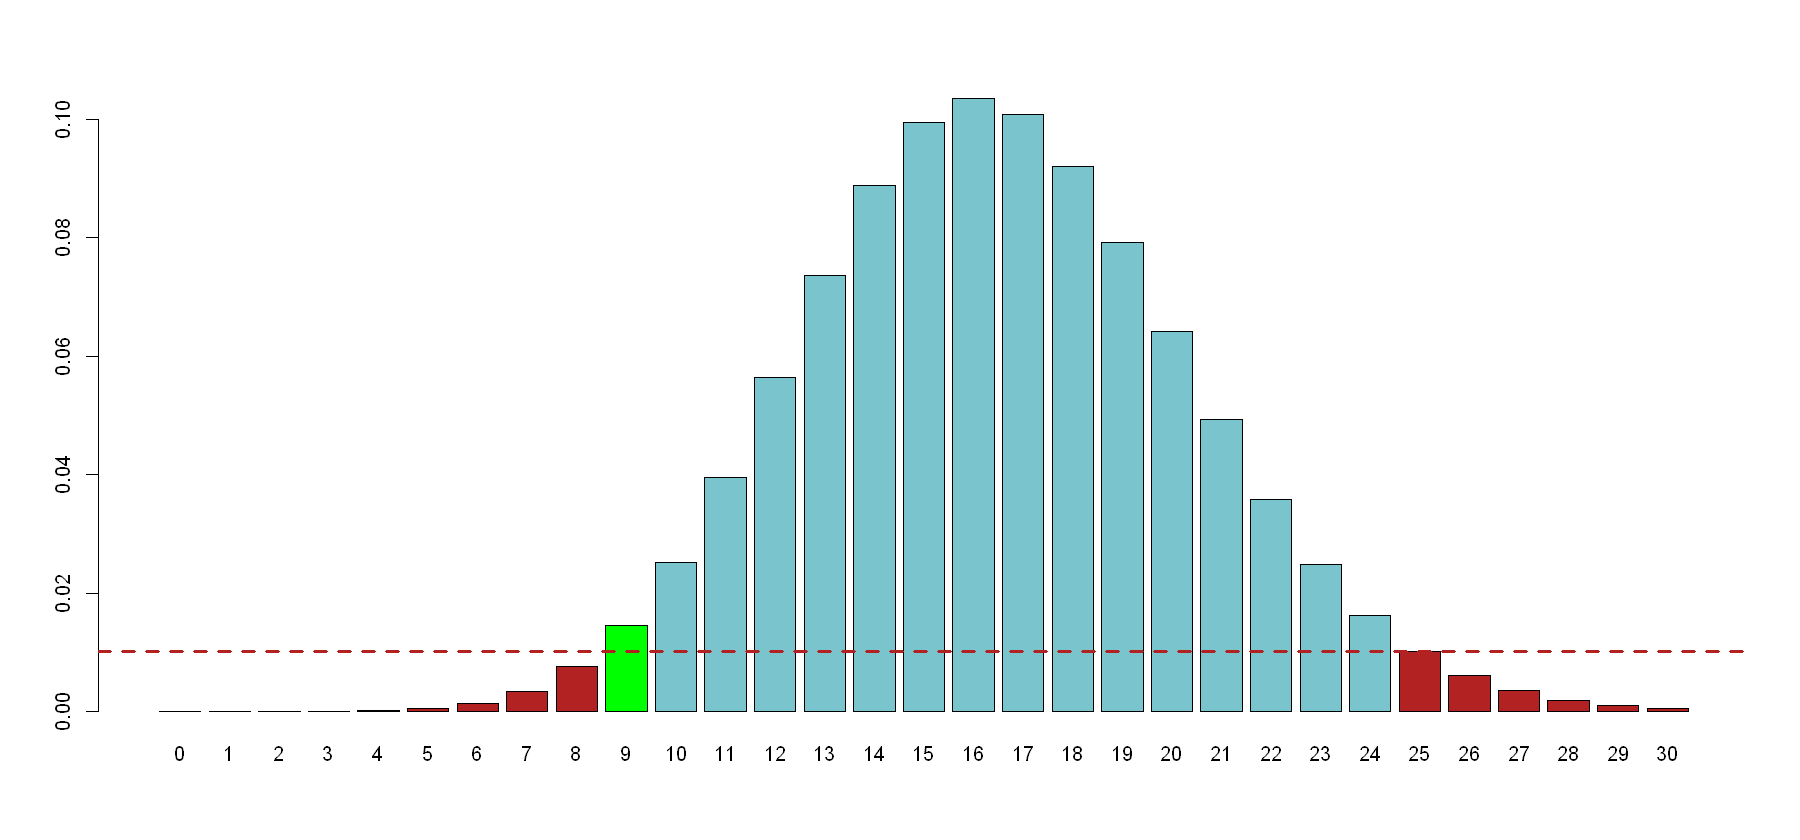

In [12]:
p_int = 0:30

colorz = c(rep('firebrick', 9), 'green', rep('cadetblue3', 15))
barplot(dbinom(p_int, size = 165, p= 0.1), names.arg=0:30, col = colorz)#, col = 'navy', lwd = 2)
binom.test(x=9, n=165, p=0.1)

abline(h = dbinom(25, size = 165, prob = 0.1), col="firebrick", lwd=3, lty=2)

message("As the considered distribution is a discrete one, the alpha in this case is slightly different from 0.5: ", 1 - sum(dbinom(9:24, size = 165, p = 0.1)))
message("As shown in the figure, the nineth bin is still inside the acceptance zone - the null hypothesis has then still to be accepted, even if it is really close to the rejection region. ")